#### Importing the files

In [1]:
import pandas as pd

co2 = pd.read_csv('final_co2.csv')
gdp = pd.read_csv('final_gdp.csv')
index = pd.read_csv('id_countries.csv')
big = pd.read_csv('the_big_one.csv')

#### matplotlib import

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')
from scipy import stats

In [3]:
big[4:].sort_values(by='In millions', ascending=False).head(10)[['Country','Year','In millions']]

,Country,Year,In millions
731,United States of America,2010,14992052.0
730,United States of America,2005,13036637.0
729,United States of America,1995,7639749.0
160,China,2010,6100648.0
365,Japan,2010,5700098.0
363,Japan,1995,5449118.0
364,Japan,2005,4755410.0
728,United States of America,1985,4338979.0
281,Germany,2010,3417095.0
280,Germany,2005,2861339.0


In [4]:
big.drop('Unnamed: 0', axis=1, inplace=True)

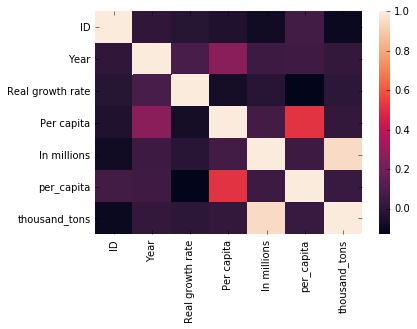

In [5]:
sns.heatmap(big.corr())

In [6]:
big.corr()

,ID,Year,Real growth rate,Per capita,In millions,per_capita,thousand_tons
ID,1.000000,0.012927,-0.013295,-0.037253,-0.080321,0.069166,-0.097410
Year,0.012927,1.000000,0.087206,0.258586,0.054183,0.056296,0.021426
Real growth rate,-0.013295,0.087206,1.000000,-0.068480,-0.009498,-0.131321,0.003402
Per capita,-0.037253,0.258586,-0.068480,1.000000,0.068842,0.516493,0.019057
In millions,-0.080321,0.054183,-0.009498,0.068842,1.000000,0.049756,0.950182
per_capita,0.069166,0.056296,-0.131321,0.516493,0.049756,1.000000,0.040528
thousand_tons,-0.097410,0.021426,0.003402,0.019057,0.950182,0.040528,1.000000


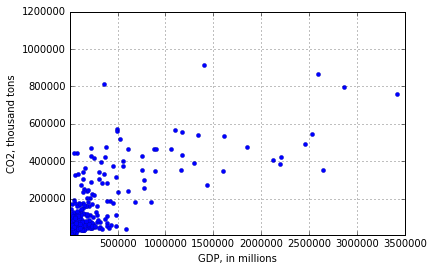

In [7]:
plt.scatter(big['In millions'][4:], big['thousand_tons'][4:], linewidth=0.11)
plt.axis([6000, 3500000, 6000, 1200000])
plt.xlabel('GDP, in millions')
plt.ylabel('CO2, thousand tons')
plt.grid()
plt.show()

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(big['In millions'],big['thousand_tons'])
line = (slope*0.6)*big['In millions']+intercept

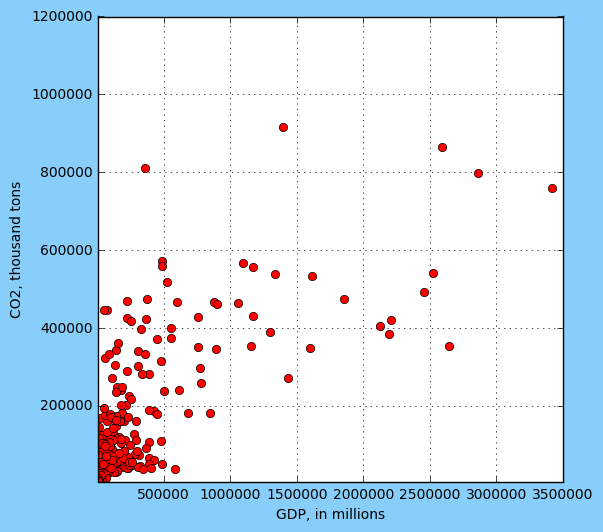

In [9]:
plt.figure(figsize=(6,6), facecolor='lightskyblue', dpi=100)
plt.plot(big['In millions'], big['thousand_tons'],'ro', linewidth= 1)
#plt.plot(big['In millions'], line)
plt.axis([6000, 3500000, 6000, 1200000])
plt.xlabel('GDP, in millions')
plt.ylabel('CO2, thousand tons')
plt.grid()
plt.show()

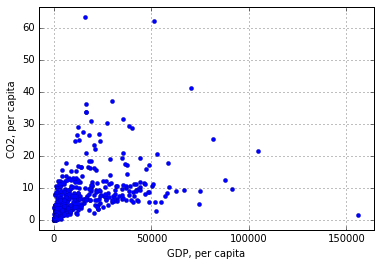

In [10]:
plt.scatter(big['Per capita'][4:], big['per_capita'][4:], linewidth=0.11)
plt.axis('tight')
plt.xlabel('GDP, per capita')
plt.ylabel('CO2, per capita')
plt.grid()
plt.show()

In [12]:
big.sort_values(by='In millions', ascending=False).head(10)

,ID,Country,Year,Real growth rate,Per capita,In millions,per_capita,thousand_tons
3,1,"Total, all countries or areas",2010,4.3,9508.0,66145612.0,4.8,33472376
2,1,"Total, all countries or areas",2005,3.9,7270.0,47550129.0,4.5,29490014
1,1,"Total, all countries or areas",1995,3.1,5406.0,31084222.0,4.0,23120435
731,840,United States of America,2010,2.6,48574.0,14992052.0,17.2,5395532
0,1,"Total, all countries or areas",1985,3.5,2776.0,13518851.0,4.1,19864139
730,840,United States of America,2005,3.5,44173.0,13036637.0,19.3,5789727
729,840,United States of America,1995,2.7,28758.0,7639749.0,19.0,5132920
160,156,China,2010,10.6,4487.0,6100648.0,6.5,8776040
365,392,Japan,2010,4.2,44341.0,5700098.0,9.2,1171625
363,392,Japan,1995,2.7,43118.0,5449118.0,9.5,1183447


In [13]:
big.sort_values(by='per_capita', ascending=False).head(10)[['Country', 'Year', 'per_capita']]

,Country,Year,per_capita
564,Qatar,1995,63.4
565,Qatar,2005,62.1
566,Qatar,2010,41.1
716,United Arab Emirates,1985,37.0
694,Trinidad and Tobago,2010,36.1
563,Qatar,1985,33.7
382,Kuwait,1995,33.7
383,Kuwait,2005,31.6
497,Netherlands Antilles [former],2005,30.8
717,United Arab Emirates,1995,30.1


In [14]:
emerging = pd.DataFrame(['Brazil', 'Chile', 'China', 'Colombia', 'Czech Republic', 'Egypt', 'Greece', 'Hungary', 'India', 'Indonesia', 'Korea', 'Malaysia', 'Mexico', 'Morocco', 'Qatar', 'Peru', 'Philippines', 'Poland', 'Russia', 'South Africa', 'South Korea', 'Taiwan', 'Thailand', 'Turkey', 'United Arab Emirates'], columns=['Country'])
developed = pd.DataFrame(["Australia", "Austria", "Belgium", "Canada", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Iceland", "Ireland", "Israel", "Italy", "Japan", "Luxembourg", "Netherlands", "New Zealand", "Norway", "Portugal", "Slovenia", "South Korea", "Spain", "Sweden", "Singapore", "Switzerland", "Turkey", "United Kingdom", "United States"], columns=['Country'])

In [15]:
emerging = pd.merge(big, emerging, how='inner', on='Country')
develop = pd.merge(big, developed, how='inner', on='Country')

In [16]:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(emerging['Per capita'],emerging['per_capita'])
line1 = slope1*emerging['Per capita']+intercept1


In [17]:
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(develop['Per capita'],develop['per_capita'])
line2 = slope2*develop['Per capita']+intercept2

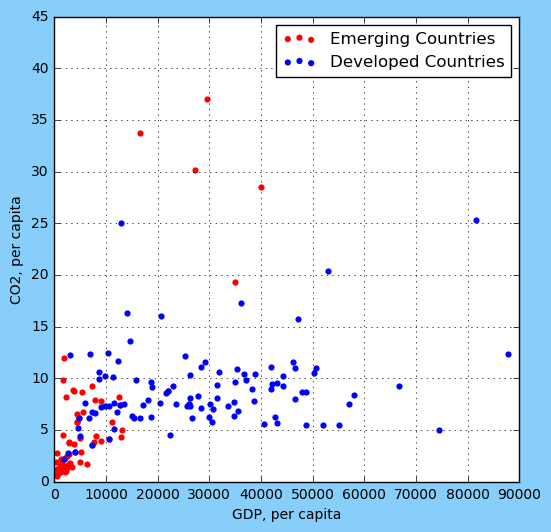

In [18]:
plt.figure(figsize=(6,6), facecolor='lightskyblue', dpi=100)
plt.scatter(emerging['Per capita'][4:], emerging['per_capita'][4:], linewidth=0.000001, c='r', label='Emerging Countries')

plt.scatter(develop['Per capita'][4:], develop['per_capita'][4:], linewidth=0.000001, c='b', label='Developed Countries')

plt.legend()
plt.axis([0,90000, 0, 45])
plt.xlabel('GDP, per capita')
plt.ylabel('CO2, per capita')
plt.grid()
plt.show()

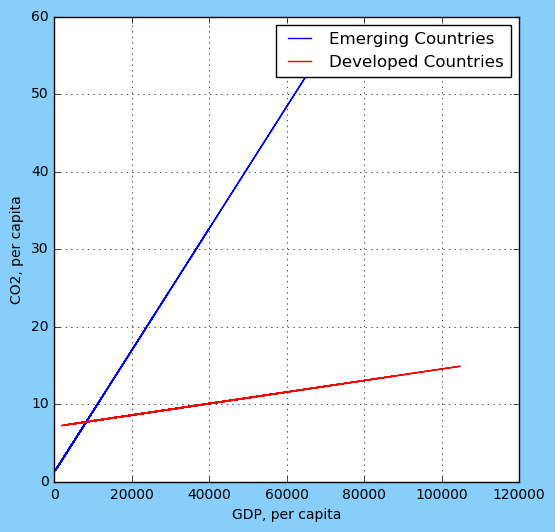

In [19]:
plt.figure(figsize=(6,6), facecolor='lightskyblue', dpi=100)
plt.plot(emerging['Per capita'], line1, 'b-', label='Emerging Countries')
plt.plot(develop['Per capita'], line2, 'r-', label='Developed Countries')
plt.plot
plt.legend()
#plt.axis([0,90000, 0, 45])
plt.xlabel('GDP, per capita')
plt.ylabel('CO2, per capita')
plt.grid()
plt.show()